In [1]:
import sys
sys.path.append("D:/Zoo/Gull/geoVeRoPy")
import geoVeRoPy
import shapely
import matplotlib.pyplot as plt

import math
import random
# %matplotlib notebook

## Solving TSP with different approaches

In this notebook, we are going to demonstrate the efficiency/accuracy of different methods for solving the TSP. Including

1. Exact methods
    - DFJ formulation
        - Lazy cut (when we find a violation of subtour constraint, add the lazy cut and go on)
        - Plain loop (when we find a violation of subtour constraint, restart the IP)
    - MTZ formulation
    - Multi-commodity formulation
    - Shortest path formulation (or time-staged formulation)
    - Quadratic formulation
    
2. Heuristic methods
    - Construction phase
    - Local search phase
    
3. Metaheuristic methods
    - Genetic Algorithm
    - Tabu Search
    - Simulated Annealing

### 0. Preparation
In this section, we will randomly generate a TSP instance

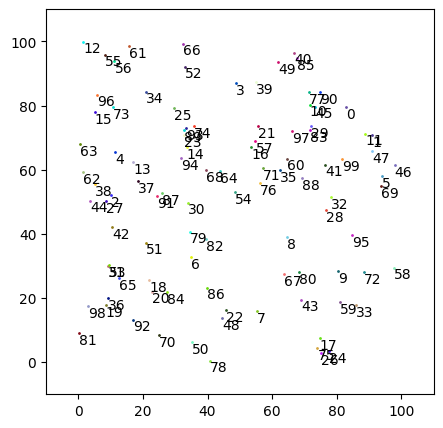

In [2]:
# Generate and plot instance
nodes = geoVeRoPy.rndNodes(
    N = 100,
    distr = 'UniformSquareXY',
    xRange = (0, 100),
    yRange = (0, 100)
)
fig, ax = geoVeRoPy.plotNodes(
    nodes = nodes, 
    boundingBox = (0, 100, 0, 100)
)

In [3]:
geoVeRoPy.configSetLog("DEBUG_PRINT_LOG", True)

### 1. DFJ formulation

Define the decision variable $x_{ij}$ as the following

\begin{equation}
    x_{ij} = \begin{cases}
        1, &\text{if goes from } i \text{ to } j\\ 
        0, & \text{otherwise}
    \end{cases}, \quad (i, j) \in A
\end{equation}

IP formulation:


\begin{align}
    \min \quad &\sum_{(i, j)\in A} c_{ij}x_{ij}\\
    \text{s.t.} \quad & \sum_{j \in V, (i,j)\in A} x_{ij} = 1, \quad \forall i \in V \label{TSP:con:degree1}\\
                      & \sum_{i \in V, (i,j)\in A} x_{ij} = 1, \quad \forall j \in V \label{TSP:con:degree2}\\
				      & \sum_{j\notin S, i\in S, (i,j)\in A} x_{ij} \ge 1, \quad \forall S \subset V, 2\le |S| \le n-1 \label{TSP:con:DFJSubtour1}\\
                      & x_{ij} \in \{0, 1\}, \quad \forall (i, j) \in A   
\end{align}




In [4]:
# DFJ with lazy cut
DFJ_Lazy = geoVeRoPy.solveTSP(
    nodes = nodes, 
    edges = 'Euclidean',
    algo = 'Exact',
    fml = 'DFJ_Lazy',
    solver = 'Gurobi',
    detailsFlag = False,
    outputFlag = False)


--------------------------------------------
--------------------------------------------



In [5]:
DFJ_Lazy['ofv'], DFJ_Lazy['runtime']

(754.7758679534738, 2.072873)

In [6]:
DFJ_Lazy

{'ofv': 754.7758679534738,
 'seq': [0,
  90,
  77,
  85,
  40,
  49,
  39,
  3,
  21,
  57,
  16,
  71,
  76,
  54,
  64,
  68,
  94,
  14,
  23,
  89,
  93,
  74,
  25,
  34,
  52,
  66,
  61,
  56,
  55,
  12,
  96,
  73,
  15,
  63,
  62,
  38,
  44,
  27,
  2,
  4,
  13,
  37,
  91,
  87,
  30,
  79,
  82,
  6,
  86,
  84,
  20,
  18,
  51,
  42,
  31,
  53,
  65,
  36,
  19,
  98,
  81,
  92,
  70,
  50,
  78,
  48,
  22,
  7,
  67,
  8,
  80,
  43,
  17,
  75,
  26,
  24,
  33,
  59,
  9,
  72,
  58,
  95,
  28,
  32,
  69,
  5,
  46,
  47,
  1,
  11,
  99,
  41,
  88,
  35,
  60,
  97,
  83,
  29,
  10,
  45,
  0],
 'gap': 0,
 'solType': 'IP_Optimal',
 'lowerBound': 754.7758679534738,
 'upperBound': 754.7758679534738,
 'runtime': 2.072873}

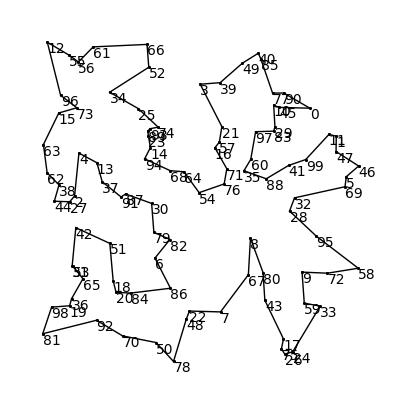

In [7]:
fig, ax = geoVeRoPy.plotNodes(
    nodes = nodes, 
    boundingBox = (0, 100, 0, 100)
)
# Plot the result of TSP
fig, ax = geoVeRoPy.plotNodeSeq(
    fig = fig,
    ax = ax,
    nodes = nodes, 
    nodeSeq = DFJ_Lazy['seq'],
    lineColor = 'black',
    showAxis = False)

The following figure shows the result for TSP, since every formulation will yield to the same result, we are not going to repeat this part

### 2. MTZ formulation

Define the decision variable $x_{ij}$ as the following

\begin{equation}
    x_{ij} = \begin{cases}
        1, &\text{if goes from } i \text{ to } j\\ 
        0, & \text{otherwise}
    \end{cases}, \quad (i, j) \in A
\end{equation}

Define $t_i$ as the time of visisting vertex $i$

IP formulation:


\begin{align}
    \min \quad &\sum_{(i, j)\in A} \tau_{ij}x_{ij}\\
    \text{s.t.} \quad & \sum_{j \in V, (i,j)\in A} x_{ij} = 1, \quad \forall i \in V\\
                      & \sum_{i \in V, (i,j)\in A} x_{ij} = 1, \quad \forall j \in V\\
					  & t_i + \tau_{ij} \le t_j  + M(1 - x_{ij}), \quad i, j = 2, \cdots, n \in V, (i, j) \in A\\
                      & x_{ij} \in \{0, 1\}, \quad \forall (i, j) \in A\\
					  & t_i \ge 0, \quad i \in 1, \cdots, n \in V
\end{align}


In [9]:
# MTZ
MTZ = geoVeRoPy.solveTSP(
    nodes = nodes, 
    edges = 'Euclidean',
    algo = 'Exact',
    fml = 'MTZ',
    solver = 'Gurobi',
    outputFlag = False)
print(MTZ)

{'ofv': 754.7758679534738, 'seq': [0, 90, 77, 85, 40, 49, 39, 3, 21, 57, 16, 71, 76, 54, 64, 68, 94, 14, 23, 89, 93, 74, 25, 34, 52, 66, 61, 56, 55, 12, 96, 73, 15, 63, 62, 38, 44, 27, 2, 4, 13, 37, 91, 87, 30, 79, 82, 6, 86, 84, 20, 18, 51, 42, 31, 53, 65, 36, 19, 98, 81, 92, 70, 50, 78, 48, 22, 7, 67, 8, 80, 43, 17, 75, 26, 24, 33, 59, 9, 72, 58, 95, 28, 32, 69, 5, 46, 47, 1, 11, 99, 41, 88, 35, 60, 97, 83, 29, 10, 45, 0], 'gap': 0, 'solType': 'IP_Optimal', 'lowerBound': 754.7758679534738, 'upperBound': 754.7758679534738, 'runtime': 431.494394}


### 3. Multi-Commodity flow formulation

Define the decision variable $x_{ij}$ as the following

\begin{equation}
    x_{ij} = \begin{cases}
        1, &\text{if goes from } i \text{ to } j\\ 
        0, & \text{otherwise}
    \end{cases}, \quad (i, j) \in A
\end{equation}

Define $y_{ij}^k$ as commodity flow for the $k$th commodity when traveling through edge $(i, j)$

IP formulation:


\begin{align}
    \min \quad &\sum_{(i, j)\in A} c_{ij}x_{ij}\\
    \text{s.t.} \quad & \sum_{j \in V, (i,j)\in A} x_{ij} = 1, \quad \forall i \in V\\
                      & \sum_{i \in V, (i,j)\in A} x_{ij} = 1, \quad \forall j \in V\\
					  & y_{ij}^k \le x_{ij}, \quad \forall i, j, k \in N, k \neq 1\\
					  & \sum_{i \in V} y_{1i}^k = 1, \quad \forall k \in V \setminus \{1\}\\
					  & \sum_{i \in V} y_{i1}^k = 0, \quad \forall k \in V \setminus \{1\}\\
					  & \sum_{i \in V} y_{ik}^k = 1, \quad \forall k \in V \setminus \{1\}\\
					  & \sum_{j \in V} y_{kj}^k = 0, \quad \forall k \in V \setminus \{1\}\\
					  & \sum_{i \in V} y_{ij}^k - \sum_{i \in V} y_{ji}^k = 0, \quad \forall j, k \in V \setminus \{1\}, j \neq k\\
                      & x_{ij} \in \{0, 1\}, \quad \forall (i, j) \in A\\
                      & y_{ij}^k \in \mathbb{Z}, \quad \forall i, j, k \in N, k \neq 1\\
\end{align}


In [9]:
# MultiCommodityFlow
MultiCommodityFlow = geoVeRoPy.solveTSP(
    nodes = nodes, 
    edges = 'Euclidean',
    algo = 'Exact',
    fml = 'MultiCommodityFlow',
    solver = 'Gurobi',
    outputFlag = False)
print(MultiCommodityFlow)

{'ofv': 470.94107664605053, 'seq': [0, 17, 8, 25, 11, 28, 6, 9, 5, 16, 29, 1, 19, 2, 26, 18, 14, 27, 23, 22, 4, 10, 12, 21, 20, 15, 24, 13, 7, 3, 0], 'gap': 0, 'solType': 'IP_Optimal', 'lowerBound': 470.94107664605053, 'upperBound': 470.94107664605053, 'runtime': 7.546439}


### 4. Shortest path formulation (time-staged formulation)

Define $x_{ij}^t$ as the following

\begin{equation}
    x_{ij}^t = \begin{cases}
                    1, \quad \text{If path crosses arc } (i, t) \text{ and } (j, t + 1) \\
                    0, \quad \text{Otherwise}
                \end{cases}, \quad i \in V, j \in V \setminus \{i\}, t = 1, \cdots, n
\end{equation}

IP formulation:

\begin{align}
    \min \quad &\sum_{i \in V}\sum_{j \in V\setminus \{i\}} c_{ij} \sum_{t = 1}^n x_{ij}^t\\
    \text{s.t.} \quad &\sum_{j \in V \setminus \{1\}} x_{1j}^1 = 1\\
    &\sum_{j \in V \setminus \{1, i\}} x_{ij}^2 - x_{1i}^1 = 0, \quad \forall i \in V \setminus \{1\} \\
    &\sum_{j \in V \setminus \{1, i\}} x_{ij}^t - \sum_{j \in V \setminus \{1, i\}} x_{ji}^{t - 1} = 0, \quad \forall i \in V \setminus \{1\}, t \in \{2, \dots, n - 1\}\\
    &x_{i1}^n - \sum_{j \in V \setminus \{1, i\}} x_{ji}^{n - 1} = 0, \quad \forall i \in V \setminus \{1\} \\
    &\sum_{i \in V \setminus \{1\}} x_{i1}^n = 1\\
    &\sum_{t = 2}^{n - 1}\sum_{j \in V \setminus \{1, i\}} x_{ij}^t + x_{i1}^n \le 1, \quad \forall i \in V \setminus \{1\}\\ 
    &x_{1i}^1 + \sum_{t = 2}^{n - 1}\sum_{j \in V \setminus \{1, i\}} x_{ji}^t \le 1, \quad \forall i \in V \setminus \{1\}\\
\end{align}

In [10]:
# ShortestPath
ShortestPath = geoVeRoPy.solveTSP(
    nodes = nodes, 
    edges = 'Euclidean',
    algo = 'Exact',
    fml = 'ShortestPath',
    solver = 'Gurobi',
    outputFlag = False,
    timeLimit = 180)
print(ShortestPath)

{'ofv': 470.9410707429944, 'seq': [0, 17, 8, 25, 11, 28, 6, 9, 5, 16, 29, 1, 19, 2, 26, 18, 14, 27, 23, 22, 4, 10, 12, 21, 20, 15, 24, 13, 7, 3, 0], 'gap': 0, 'solType': 'IP_Optimal', 'lowerBound': 470.9410707429944, 'upperBound': 470.9410707429944, 'runtime': 132.133298}


### 5. Quadratic formulation

Assuming we have $n$ boxes, which represents $n$ steps in the path. Define $x_{ij}$ as 

\begin{equation}
    x_{ij} = \begin{cases}
                1, \quad \text{Vertex $i$ is assigned to box $j$}\\
                0, \quad \text{Otherwise}
            \end{cases}
\end{equation}

IP formulation:

\begin{align}
    \min \quad & \sum_{i \in V} \sum_{j \in V \setminus \{i\}} \sum_{k = 1}^{n - 1} c_{ij} w_{ij}^k + \sum_{i \in V} \sum_{j \in V \setminus \{i\}} c_{ij}w_{ij}^n\\
    \text{s.t.} \quad & \sum_{j = 1}^n x_{ij} = 1, \quad \forall i \in V\\
                      & \sum_{i \in V}^n x_{ij} = 1, \quad j = 1, \dots, n\\
                      & w_{ij}^k \ge x_{ik} + x_{j, k + 1} - 1, \quad i \in V,  j \in V \setminus \{i\}, k = 1, \cdots, n - 1\\
                      & w_{ij}^k \ge x_{ik} + x_{j1} - 1, \quad i \in V, j \in V \setminus \{i\}, k = n \\
                      & w_{ij}^k \in \{0, 1\}, \quad i \in V, j \in V \setminus \{i\}, k = 1, \dots, n\\
                      & x_{ij} \in \{0, 1\}, \quad i \in V, j \in V \setminus \{i\}
\end{align}

In [11]:
# QAP
QAP = geoVeRoPy.solveTSP(
    nodes = nodes, 
    edges = 'Euclidean',
    algo = 'Exact',
    fml = 'QAP',
    solver = 'Gurobi',
    outputFlag = False,
    timeLimit = 180)
print(QAP)

{'ofv': 709.7268057225604, 'seq': [0, 7, 13, 24, 15, 20, 4, 10, 22, 2, 19, 29, 6, 9, 28, 5, 16, 1, 18, 14, 12, 21, 17, 26, 27, 23, 3, 11, 8, 25, 0], 'gap': 0.971659436672179, 'solType': 'IP_TimeLimit', 'lowerBound': 20.11405748303235, 'upperBound': 709.7268057225605, 'runtime': 180.792381}


### 6. Insertion + 2Opt

In [8]:
InsertionAnd2Opt = geoVeRoPy.solveTSP(
    nodes = nodes,
    edges = 'Euclidean',
    algo = 'Heuristic',
    cons = 'Insertion',
    impv = '2Opt')

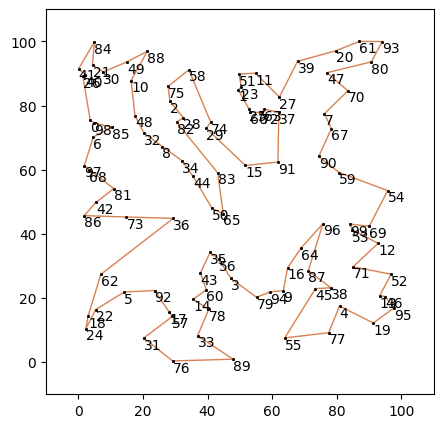

In [9]:
fig, ax = geoVeRoPy.plotNodes(
    nodes = nodes, 
    boundingBox = (0, 100, 0, 100)
)
fig, ax = geoVeRoPy.plotNodeSeq(
    fig = fig,
    ax = ax,
    nodes = nodes, 
    nodeSeq = InsertionAnd2Opt['seq'])

In [10]:
GA = geoVeRoPy.solveTSP(
    nodes = nodes,
    edges = 'Euclidean',
    algo = 'Metaheuristic',
    cons = 'Random',
    popSize = 100,
    meta = 'GeneticAlgorithm',
    neighRatio = {
        'swap': 0.1,
        'exchange': 0.1,
        'rotate': 0.2,
        'crossover': 0.7
    },
    stop = {
        'runtime': 10
    })

In [11]:
GA['ofv']

2892.3974870965367

In [12]:
SA = geoVeRoPy.solveTSP(
    nodes = nodes,
    edges = 'Euclidean',
    algo = 'Metaheuristic',
    cons = 'Random',
    meta = 'SimulatedAnnealing',
    initTemp = 100,
    lengTemp = 10,
    coolRate = 0.98,
    neighRatio = {
        'swap': 0.2,
        'exchange': 0.2,
        'rotate': 0.6,
    },
    stop = {
        'runtime': 10
    })

In [13]:
SA['ofv']

851.4627166099779

In [14]:
TS = geoVeRoPy.solveTSP(
    nodes = nodes,
    edges = 'Euclidean',
    algo = 'Metaheuristic',
    cons = 'Random',
    meta = 'TabuSearch',
    maxTabuListLength = 1000,
    neighNum = 20,
    neighRatio = {
        'swap': 0.2,
        'exchange': 0.2,
        'rotate': 0.6,
    },
    stop = {
        'numNoImproveIter': 100
    })

In [15]:
TS['ofv'], TS['runtime']

(939.5826511294304, 8.610191)

In [ ]:
fig, ax = geoVeRoPy.plotNodes(
    nodes = nodes, 
    boundingBox = (0, 100, 0, 100)
)
fig, ax = geoVeRoPy.plotNodeSeq(
    fig = fig,
    ax = ax,
    nodes = nodes, 
    nodeSeq = GA['seq'])